# Explore here

In [2]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(url)

# Select the required columns
housing_data = data[['Latitude', 'Longitude', 'MedInc']]

# Split the dataset into train and test sets
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(train_set)

# Predict the clusters and store them in a new column
train_set['Cluster'] = kmeans.predict(train_set)

# Add the clusters to the original dataframe
housing_data['Cluster'] = kmeans.predict(housing_data[['Latitude', 'Longitude', 'MedInc']])


/var/folders/7_/fjl3bcd55215j41f_5pq_py80000gn/T/ipykernel_54520/1365096190.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data['Cluster'] = kmeans.predict(housing_data[['Latitude', 'Longitude', 'MedInc']])


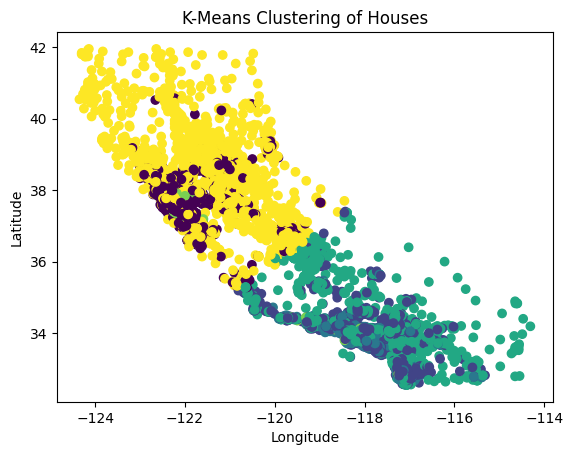

In [4]:
# Plot the clusters
plt.scatter(train_set['Longitude'], train_set['Latitude'], c=train_set['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of Houses')
plt.show()


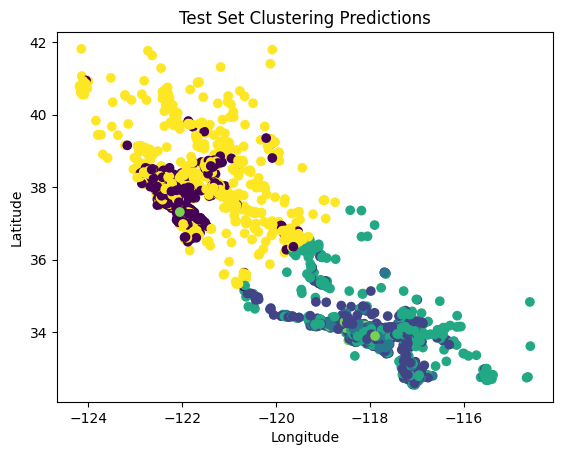

In [5]:
# Predict clusters for the test set
test_set['Cluster'] = kmeans.predict(test_set[['Latitude', 'Longitude', 'MedInc']])

# Plot to confirm predictions
plt.scatter(test_set['Longitude'], test_set['Latitude'], c=test_set['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Test Set Clustering Predictions')
plt.show()


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Prepare features and labels
X_train = train_set[['Latitude', 'Longitude', 'MedInc']]
y_train = train_set['Cluster']
X_test = test_set[['Latitude', 'Longitude', 'MedInc']]
y_test = test_set['Cluster']

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       561
           1       1.00      0.99      1.00       983
           2       1.00      0.99      0.99       299
           3       0.99      1.00      0.99      1111
           4       0.94      0.98      0.96        62
           5       1.00      0.99      1.00      1112

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



In [7]:
import joblib

# Save the K-Means model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the decision tree classifier
joblib.dump(clf, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

In [8]:
# Load the models
kmeans_loaded = joblib.load('kmeans_model.pkl')
clf_loaded = joblib.load('decision_tree_model.pkl')
